In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split#, Bootstrap
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


## Step 1: Generate some (> 75) random blobs

X, y = make_blobs...


## Step 2: Plot 'em, with color as a label
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111)

ax.scatter...

In [12]:
X, y = make_blobs(n_samples=10000, 
                  n_features=100, centers=100, random_state=0)

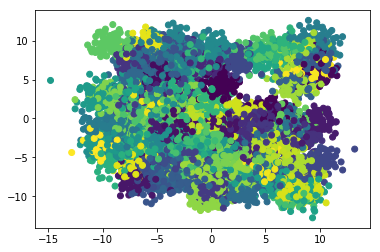

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y)

### RTFM:

- [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

The main parameters to adjust when using these methods is **n_estimators** and **max_features**. 

- The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. 

- The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. 

Empirical good default values are max_features=n_features for regression problems, and max_features=sqrt(n_features) for classification tasks (where n_features is the number of features in the data).

## Step 3: 

- Create one each of a DecisionTreeClassifier, RandomForestClassifier, ExtraTreesClassifier and object:

## Step 4:

- Print the Cross Validated Score for each classifier (hint: you don't have to use the fit() or predict() methods() )

## Questions:

1. Which classifier model has the best score?
2. What happens when you change the parameters of the model (e.g. n_estimators)? Does the cross_val_score change significantly?


In [14]:
# ExtraTreeClassifier provides the best score
'''
ecisionTreeClassifier 0.980510992276
RandomForestClassifier 0.999595959596
ExtraTreesClassifier 0.999800950683
'''

#  Yes, the higher n_estimators provide better scores

'\necisionTreeClassifier 0.980510992276\nRandomForestClassifier 0.999595959596\nExtraTreesClassifier 0.999800950683\n'

In [13]:
## DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=None)
scores = cross_val_score(dt_clf, X, y)
print("DecisionTreeClassifier", scores.mean())

## RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=None)
scores = cross_val_score(rf_clf, X, y)
print("RandomForestClassifier", scores.mean())

## ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(max_depth=None)
scores = cross_val_score(extra_trees_clf, X, y)
print("ExtraTreesClassifier", scores.mean())

DecisionTreeClassifier 0.984411764706
RandomForestClassifier 1.0
ExtraTreesClassifier 1.0


## Step 5: 

- Create test/train splits of the original data set

x_train, x_test, y_train, y_test = train_test_split(...)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

## Step 6:

- Fit the training data to the model (call the fit() methods on them)
- Create [Confusion Matrixes](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for each model (hint: you have to run the predict() method)


In [17]:
## DecisionTreeClassifier
dt_clf.fit(x_train, y_train)
dt_pred=dt_clf.predict(x_test)
print(metrics.confusion_matrix(y_test,dt_pred ))


## RandomForestClassifier
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print(metrics.confusion_matrix(y_test, rf_pred))


## ExtraTreesClassifier
extra_trees_clf.fit(x_train, y_train)
et_pred = extra_trees_clf.predict(x_test)
print(metrics.confusion_matrix(y_test, et_pred))

[[23  0  0 ...,  0  0  0]
 [ 0 24  0 ...,  0  0  0]
 [ 0  0 19 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 23  0  0]
 [ 0  0  1 ...,  0 20  0]
 [ 0  0  0 ...,  0  0 11]]
[[23  0  0 ...,  0  0  0]
 [ 0 24  0 ...,  0  0  0]
 [ 0  0 19 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 23  0  0]
 [ 0  0  0 ...,  0 24  0]
 [ 0  0  0 ...,  0  0 11]]
[[23  0  0 ...,  0  0  0]
 [ 0 24  0 ...,  0  0  0]
 [ 0  0 19 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 23  0  0]
 [ 0  0  0 ...,  0 24  0]
 [ 0  0  0 ...,  0  0 11]]


## Application to other data sets

Here we have a dataset of chapters from books and plays by specific authors, and their usages of stop words. Let's see how accurately a random forest can predict the author based on stop word usage.

In [19]:
import random
from sklearn.cross_validation import train_test_split #, Bootstrap
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing

## Step 1: Read the data into a DataFrame

- "http://people.stern.nyu.edu/jsimonof/AnalCatData/Data/Comma_separated/authorship.csv"

- Print the columns, print df.head()

In [20]:
# Read in the authorship csv file.
authorship = pd.read_csv("http://people.stern.nyu.edu/jsimonof/AnalCatData/Data/Comma_separated/authorship.csv")
print(authorship.columns)

Index(['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been',
       'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had',
       'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its',
       'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one',
       'only', 'or', 'our', 'should', 'so', 'some', 'such', 'than', 'that',
       'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up', 'upon',
       'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would',
       'your', 'BookID', 'Author'],
      dtype='object')


In [21]:
authorship.head()

,a,all,also,an,and,any,are,as,at,be,...,what,when,which,who,will,with,would,your,BookID,Author
0,46,12,0,3,66,9,4,16,13,13,...,7,5,6,8,4,9,1,0,1,Austen
1,35,10,0,7,44,4,3,18,16,9,...,5,7,7,3,5,14,8,0,1,Austen
2,46,2,0,3,40,1,13,11,9,23,...,10,4,6,4,5,15,3,9,1,Austen
3,40,7,0,4,64,3,3,20,13,20,...,3,6,10,5,3,22,4,3,1,Austen
4,29,5,0,6,52,5,14,17,6,16,...,8,4,13,2,4,21,10,0,1,Austen


## Step 2: Create a unique list of author names and print it

In [22]:

# Setting a list to represent all the authors in the file
authors = authorship.Author.unique()
print("Authors:", authors)

Authors: ['Austen' 'London' 'Milton' 'Shakespeare']


## Step 3: 

Use the LabelEncoder to encode Authors to integers...

### Question:

1. What does the LabelEncoder do for us? 

In [23]:
# Use LabelEncoder to encode Authors to integers
le = preprocessing.LabelEncoder()
le.fit(authors)
authorship['Author_num'] = le.transform(authorship['Author']) # Actually sets the author's "number" or id
print(authorship['Author_num'])

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
811    3
812    3
813    3
814    3
815    3
816    3
817    3
818    3
819    3
820    3
821    3
822    3
823    3
824    3
825    3
826    3
827    3
828    3
829    3
830    3
831    3
832    3
833    3
834    3
835    3
836    3
837    3
838    3
839    3
840    3
Name: Author_num, Length: 841, dtype: int64


In [26]:
#What are some of the stop words we're looking at?
features = list(authorship.columns)
features.remove('Author')
features.remove('Author_num')
print(features)
print(len(features))

['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had', 'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its', 'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up', 'upon', 'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'your', 'BookID', 'random']
71


## Step 4:

- Create a random variable column 
- Create test/train sets using test_train_split

In [29]:
# Create a random variable (random forests work best with a random variable)
# and create a test and training set
authorship['random'] = [random.random() for i in range(841)]
x, y = authorship[features], authorship.Author_num.values
x_train, x_test, y_train, y_test = train_test_split(authorship[features],
                                                    authorship.Author_num.values,
                                                    test_size=0.4,
                                                    random_state=123)



## Step 5:

- Create three classifier objects: ExtraTreesClassifier, AdaBoostClassifier, MultinomialNB
- Fit training data
- Compare cross-validation scores
- Print out Confusion Matrixes

### Questions:

1. Which classifiers perform best with this data? Why is that?
2. What adjustments can you make to the classifier object instantiation to change the outcome of the predictions?
3. (Similar to Q2) What are the trade-offs between the different models and different input tuning params?
4. Create some additional classifiers and compare them

In [ ]:
## Compare the results here of random forests, adaboost, and a non-ensembled naive bayes classifier.

#print ExtraTreesClassifier.__name__, 'results'



#print AdaBoostClassifier.__name__, 'results'

# XGBoostClassifier

#print MultinomialNB.__name__, 'results'


## Sometimes a simpler answer is a better approach!

In [33]:
## ExtraTreesClassifier
X=authorship[features]
y=authorship.Author_num.values
    
extra_trees_clf = ExtraTreesClassifier(max_depth=None)
scores = cross_val_score(extra_trees_clf, X, y)
print("ExtraTreesClassifier Score:", scores.mean())

## ExtraTreesClassifier
extra_trees_clf.fit(x_train, y_train)
y_pred = extra_trees_clf.predict(x_test)
print("Confusion Metric:", metrics.confusion_matrix(y_test, y_pred))

ExtraTreesClassifier Score: 0.964394895835
Confusion Metric: [[133   2   0   1]
 [  1  98   0   0]
 [  1   3  15   1]
 [  3   3   1  75]]


In [36]:
## AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaBoost= AdaBoostClassifier()
scores = cross_val_score(adaBoost, X, y)
print("AdaBoostClassifier Score:", scores.mean())

## ExtraTreesClassifier
adaBoost.fit(x_train, y_train)
y_pred = extra_trees_clf.predict(x_test)
print("Confusion Metric:", metrics.confusion_matrix(y_test, y_pred))


AdaBoostClassifier Score: 0.806487905761
Confusion Metric: [[133   2   0   1]
 [  1  98   0   0]
 [  1   3  15   1]
 [  3   3   1  75]]
